In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from math import nan
import sys

from smyleutils import averaging_utils as avg
from smyleutils import qboplot_utils as qbo
from smyleutils import colorbar_utils as cbars
from smyleutils import bootstrap_utils as boot


In [2]:
plotpath="/project/cas/islas/python_plots/NCAR_CW3E_SMYLE/FIGURES/"

### Read in the data

In [3]:
basepath="/project/cas/islas/python_savs/NCAR_CW3E_SMYLE/DATA_SORT/Uzm/"
high_nov_uzm=xr.open_dataset(basepath+'Uzm_BSMYLE-CW3E-L83_day_init11.nc').Uzm
low_nov_uzm=xr.open_dataset(basepath+'Uzm_BSMYLE-CW3E_day_init11.nc').Uzm
era5_nov_uzm=xr.open_dataset(basepath+'Uzm_ERA5_day_init11.nc').Uzm

high_feb_uzm=xr.open_dataset(basepath+'Uzm_BSMYLE-CW3E-L83_day_init02.nc').Uzm
low_feb_uzm=xr.open_dataset(basepath+'Uzm_BSMYLE-CW3E_day_init02.nc').Uzm
era5_feb_uzm=xr.open_dataset(basepath+'Uzm_ERA5_day_init02.nc').Uzm

high_sep_uzm=xr.open_dataset(basepath+'Uzm_BSMYLE-CW3E-L83_day_init09.nc').Uzm
low_sep_uzm=xr.open_dataset(basepath+'Uzm_BSMYLE-CW3E_day_init09.nc').Uzm
era5_sep_uzm=xr.open_dataset(basepath+'Uzm_ERA5_day_init09.nc').Uzm


basepath="/project/cas/islas/python_savs/NCAR_CW3E_SMYLE/DATA_SORT/Tzm/"
high_nov_tzm=xr.open_dataset(basepath+'Tzm_BSMYLE-CW3E-L83_day_init11.nc').__xarray_dataarray_variable__
low_nov_tzm=xr.open_dataset(basepath+'Tzm_BSMYLE-CW3E_day_init11.nc').__xarray_dataarray_variable__
era5_nov_tzm=xr.open_dataset(basepath+'Tzm_ERA5_day_init11.nc').Tzm

high_feb_tzm=xr.open_dataset(basepath+'Tzm_BSMYLE-CW3E-L83_day_init02.nc').__xarray_dataarray_variable__
low_feb_tzm=xr.open_dataset(basepath+'Tzm_BSMYLE-CW3E_day_init02.nc').__xarray_dataarray_variable__
era5_feb_tzm=xr.open_dataset(basepath+'Tzm_ERA5_day_init02.nc').Tzm

high_sep_tzm=xr.open_dataset(basepath+'Tzm_BSMYLE-CW3E-L83_day_init09.nc').__xarray_dataarray_variable__
low_sep_tzm=xr.open_dataset(basepath+'Tzm_BSMYLE-CW3E_day_init09.nc').__xarray_dataarray_variable__
era5_sep_tzm=xr.open_dataset(basepath+'Tzm_ERA5_day_init09.nc').Tzm


### Select the first 6 months since that's what we have for the high top

In [4]:
startdate=high_nov_uzm.time.isel(time=0).values ; enddate=high_nov_uzm.time.isel(time=high_nov_uzm.time.size-1).values
high_nov_uzm = high_nov_uzm.sel(time=slice(startdate,enddate))
low_nov_uzm = low_nov_uzm.sel(time=slice(startdate,enddate))
era5_nov_uzm = era5_nov_uzm.sel(time=slice(startdate,enddate))

startdate=high_sep_uzm.time.isel(time=0).values ; enddate=high_sep_uzm.time.isel(time=high_sep_uzm.time.size-1).values
high_sep_uzm = high_sep_uzm.sel(time=slice(startdate,enddate))
low_sep_uzm = low_sep_uzm.sel(time=slice(startdate,enddate))
era5_sep_uzm = era5_sep_uzm.sel(time=slice(startdate,enddate))

startdate=high_feb_uzm.time.isel(time=0).values ; enddate=high_feb_uzm.time.isel(time=high_feb_uzm.time.size-1).values
high_feb_uzm = high_feb_uzm.sel(time=slice(startdate,enddate))
low_feb_uzm = low_feb_uzm.sel(time=slice(startdate,enddate))
era5_feb_uzm = era5_feb_uzm.sel(time=slice(startdate,enddate))


startdate=high_nov_tzm.time.isel(time=0).values ; enddate=high_nov_tzm.time.isel(time=high_nov_tzm.time.size-1).values
high_nov_tzm = high_nov_tzm.sel(time=slice(startdate,enddate))
low_nov_tzm = low_nov_tzm.sel(time=slice(startdate,enddate))
era5_nov_tzm = era5_nov_tzm.sel(time=slice(startdate,enddate))

startdate=high_sep_tzm.time.isel(time=0).values ; enddate=high_sep_tzm.time.isel(time=high_sep_tzm.time.size-1).values
high_sep_tzm = high_sep_tzm.sel(time=slice(startdate,enddate))
low_sep_tzm = low_sep_tzm.sel(time=slice(startdate,enddate))
era5_sep_tzm = era5_sep_tzm.sel(time=slice(startdate,enddate))

startdate=high_feb_tzm.time.isel(time=0).values ; enddate=high_feb_tzm.time.isel(time=high_feb_tzm.time.size-1).values
high_feb_tzm = high_feb_tzm.sel(time=slice(startdate,enddate))
low_feb_tzm = low_feb_tzm.sel(time=slice(startdate,enddate))
era5_feb_tzm = era5_feb_tzm.sel(time=slice(startdate,enddate))


### Get tropical averaged zonal mean wind

In [5]:
high_nov_uzm_tr = avg.cosweightlat(high_nov_uzm,-5,5).load()
low_nov_uzm_tr = avg.cosweightlat(low_nov_uzm,-5,5).load()
era5_nov_uzm_tr = avg.cosweightlat(era5_nov_uzm,-5,5).load()

high_sep_uzm_tr = avg.cosweightlat(high_sep_uzm,-5,5).load()
low_sep_uzm_tr = avg.cosweightlat(low_sep_uzm,-5,5).load()
era5_sep_uzm_tr = avg.cosweightlat(era5_sep_uzm,-5,5).load()

high_feb_uzm_tr = avg.cosweightlat(high_feb_uzm,-5,5).load()
low_feb_uzm_tr = avg.cosweightlat(low_feb_uzm,-5,5).load()
era5_feb_uzm_tr = avg.cosweightlat(era5_feb_uzm,-5,5).load()


high_nov_tzm_tr = avg.cosweightlat(high_nov_tzm,-5,5).load()
low_nov_tzm_tr = avg.cosweightlat(low_nov_tzm,-5,5).load()
era5_nov_tzm_tr = avg.cosweightlat(era5_nov_tzm,-5,5).load()

high_sep_tzm_tr = avg.cosweightlat(high_sep_tzm,-5,5).load()
low_sep_tzm_tr = avg.cosweightlat(low_sep_tzm,-5,5).load()
era5_sep_tzm_tr = avg.cosweightlat(era5_sep_tzm,-5,5).load()

high_feb_tzm_tr = avg.cosweightlat(high_feb_tzm,-5,5).load()
low_feb_tzm_tr = avg.cosweightlat(low_feb_tzm,-5,5).load()
era5_feb_tzm_tr = avg.cosweightlat(era5_feb_tzm,-5,5).load()

DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat


### Interpolate the model data from the pressure levels of the CAM TEM diagnostics onto the ERA5 pressure levels

In [6]:
high_nov_uzm_tr_interp = high_nov_uzm_tr.interp(ilev=era5_nov_uzm.level)
low_nov_uzm_tr_interp = low_nov_uzm_tr.interp(ilev=era5_nov_uzm.level)

high_sep_uzm_tr_interp = high_sep_uzm_tr.interp(ilev=era5_nov_uzm.level)
low_sep_uzm_tr_interp = low_sep_uzm_tr.interp(ilev=era5_nov_uzm.level)

high_feb_uzm_tr_interp = high_feb_uzm_tr.interp(ilev=era5_nov_uzm.level)
low_feb_uzm_tr_interp = low_feb_uzm_tr.interp(ilev=era5_nov_uzm.level)

high_nov_tzm_tr_interp = high_nov_tzm_tr.interp(ilev=era5_nov_uzm.level)
low_nov_tzm_tr_interp = low_nov_tzm_tr.interp(ilev=era5_nov_uzm.level)

high_sep_tzm_tr_interp = high_sep_tzm_tr.interp(ilev=era5_nov_uzm.level)
low_sep_tzm_tr_interp = low_sep_tzm_tr.interp(ilev=era5_nov_uzm.level)

high_feb_tzm_tr_interp = high_feb_tzm_tr.interp(ilev=era5_nov_uzm.level)
low_feb_tzm_tr_interp = low_feb_tzm_tr.interp(ilev=era5_nov_uzm.level)


### Calculate the ensemble mean

In [7]:
high_nov_uzm_tr_interpm = high_nov_uzm_tr_interp.mean('M')
low_nov_uzm_tr_interpm = low_nov_uzm_tr_interp.mean('M')

high_sep_uzm_tr_interpm = high_sep_uzm_tr_interp.mean('M')
low_sep_uzm_tr_interpm = low_sep_uzm_tr_interp.mean('M')

high_feb_uzm_tr_interpm = high_feb_uzm_tr_interp.mean('M')
low_feb_uzm_tr_interpm = low_feb_uzm_tr_interp.mean('M')

high_nov_tzm_tr_interpm = high_nov_tzm_tr_interp.mean('M')
low_nov_tzm_tr_interpm = low_nov_tzm_tr_interp.mean('M')

high_sep_tzm_tr_interpm = high_sep_tzm_tr_interp.mean('M')
low_sep_tzm_tr_interpm = low_sep_tzm_tr_interp.mean('M')

high_feb_tzm_tr_interpm = high_feb_tzm_tr_interp.mean('M')
low_feb_tzm_tr_interpm = low_feb_tzm_tr_interp.mean('M')

### Calculate the lead dependent climatology

In [8]:
era5_nov_uzm_tr_clim = era5_nov_uzm_tr.mean('init_year')
high_nov_uzm_tr_interpm_clim = high_nov_uzm_tr_interpm.mean('init_year')
low_nov_uzm_tr_interpm_clim = low_nov_uzm_tr_interpm.mean('init_year')

era5_sep_uzm_tr_clim = era5_sep_uzm_tr.mean('init_year')
high_sep_uzm_tr_interpm_clim = high_sep_uzm_tr_interpm.mean('init_year')
low_sep_uzm_tr_interpm_clim = low_sep_uzm_tr_interpm.mean('init_year')

era5_feb_uzm_tr_clim = era5_feb_uzm_tr.mean('init_year')
high_feb_uzm_tr_interpm_clim = high_feb_uzm_tr_interpm.mean('init_year')
low_feb_uzm_tr_interpm_clim = low_feb_uzm_tr_interpm.mean('init_year')

era5_nov_tzm_tr_clim = era5_nov_tzm_tr.mean('init_year')
high_nov_tzm_tr_interpm_clim = high_nov_tzm_tr_interpm.mean('init_year')
low_nov_tzm_tr_interpm_clim = low_nov_tzm_tr_interpm.mean('init_year')

era5_sep_tzm_tr_clim = era5_sep_tzm_tr.mean('init_year')
high_sep_tzm_tr_interpm_clim = high_sep_tzm_tr_interpm.mean('init_year')
low_sep_tzm_tr_interpm_clim = low_sep_tzm_tr_interpm.mean('init_year')

era5_feb_tzm_tr_clim = era5_feb_tzm_tr.mean('init_year')
high_feb_tzm_tr_interpm_clim = high_feb_tzm_tr_interpm.mean('init_year')
low_feb_tzm_tr_interpm_clim = low_feb_tzm_tr_interpm.mean('init_year')

### Subtract the lead dependent climatology from ERA5 and the SMYLE ensemble mean and the SMYLE individual members

In [9]:
era5_nov_uzm_tr = era5_nov_uzm_tr - era5_nov_uzm_tr_clim
high_nov_uzm_tr_interp = high_nov_uzm_tr_interp - high_nov_uzm_tr_interpm_clim
low_nov_uzm_tr_interp = low_nov_uzm_tr_interp - low_nov_uzm_tr_interpm_clim
high_nov_uzm_tr_interpm = high_nov_uzm_tr_interpm - high_nov_uzm_tr_interpm_clim
low_nov_uzm_tr_interpm = low_nov_uzm_tr_interpm - low_nov_uzm_tr_interpm_clim

era5_sep_uzm_tr = era5_sep_uzm_tr - era5_sep_uzm_tr_clim
high_sep_uzm_tr_interp = high_sep_uzm_tr_interp - high_sep_uzm_tr_interpm_clim
low_sep_uzm_tr_interp = low_sep_uzm_tr_interp - low_sep_uzm_tr_interpm_clim
high_sep_uzm_tr_interpm = high_sep_uzm_tr_interpm - high_sep_uzm_tr_interpm_clim
low_sep_uzm_tr_interpm = low_sep_uzm_tr_interpm - low_sep_uzm_tr_interpm_clim

era5_feb_uzm_tr = era5_feb_uzm_tr - era5_feb_uzm_tr_clim
high_feb_uzm_tr_interp = high_feb_uzm_tr_interp - high_feb_uzm_tr_interpm_clim
low_feb_uzm_tr_interp = low_feb_uzm_tr_interp - low_feb_uzm_tr_interpm_clim
high_feb_uzm_tr_interpm = high_feb_uzm_tr_interpm - high_feb_uzm_tr_interpm_clim
low_feb_uzm_tr_interpm = low_feb_uzm_tr_interpm - low_feb_uzm_tr_interpm_clim

# last 2 months
era5_nov_uzm_tr_2mon = era5_nov_uzm_tr[:,-60:,:].mean('time')
high_nov_uzm_tr_2mon = high_nov_uzm_tr_interpm[:,-60:,:].mean('time')
low_nov_uzm_tr_2mon = low_nov_uzm_tr_interpm[:,-60:,:].mean('time')

era5_sep_uzm_tr_2mon = era5_sep_uzm_tr[:,-60:,:].mean('time')
high_sep_uzm_tr_2mon = high_sep_uzm_tr_interpm[:,-60:,:].mean('time')
low_sep_uzm_tr_2mon = low_sep_uzm_tr_interpm[:,-60:,:].mean('time')

era5_feb_uzm_tr_2mon = era5_feb_uzm_tr[:,-60:,:].mean('time')
high_feb_uzm_tr_2mon = high_feb_uzm_tr_interpm[:,-60:,:].mean('time')
low_feb_uzm_tr_2mon = low_feb_uzm_tr_interpm[:,-60:,:].mean('time')



era5_nov_tzm_tr = era5_nov_tzm_tr - era5_nov_tzm_tr_clim
high_nov_tzm_tr_interp = high_nov_tzm_tr_interp - high_nov_tzm_tr_interpm_clim
low_nov_tzm_tr_interp = low_nov_tzm_tr_interp - low_nov_tzm_tr_interpm_clim
high_nov_tzm_tr_interpm = high_nov_tzm_tr_interpm - high_nov_tzm_tr_interpm_clim
low_nov_tzm_tr_interpm = low_nov_tzm_tr_interpm - low_nov_tzm_tr_interpm_clim

era5_sep_tzm_tr = era5_sep_tzm_tr - era5_sep_tzm_tr_clim
high_sep_tzm_tr_interp = high_sep_tzm_tr_interp - high_sep_tzm_tr_interpm_clim
low_sep_tzm_tr_interp = low_sep_tzm_tr_interp - low_sep_tzm_tr_interpm_clim
high_sep_tzm_tr_interpm = high_sep_tzm_tr_interpm - high_sep_tzm_tr_interpm_clim
low_sep_tzm_tr_interpm = low_sep_tzm_tr_interpm - low_sep_tzm_tr_interpm_clim

era5_feb_tzm_tr = era5_feb_tzm_tr - era5_feb_tzm_tr_clim
high_feb_tzm_tr_interp = high_feb_tzm_tr_interp - high_feb_tzm_tr_interpm_clim
low_feb_tzm_tr_interp = low_feb_tzm_tr_interp - low_feb_tzm_tr_interpm_clim
high_feb_tzm_tr_interpm = high_feb_tzm_tr_interpm - high_feb_tzm_tr_interpm_clim
low_feb_tzm_tr_interpm = low_feb_tzm_tr_interpm - low_feb_tzm_tr_interpm_clim

# last 2 months
era5_nov_tzm_tr_2mon = era5_nov_tzm_tr[:,-60:,:].mean('time')
high_nov_tzm_tr_2mon = high_nov_tzm_tr_interpm[:,-60:,:].mean('time')
low_nov_tzm_tr_2mon = low_nov_tzm_tr_interpm[:,-60:,:].mean('time')

era5_sep_tzm_tr_2mon = era5_sep_tzm_tr[:,-60:,:].mean('time')
high_sep_tzm_tr_2mon = high_sep_tzm_tr_interpm[:,-60:,:].mean('time')
low_sep_tzm_tr_2mon = low_sep_tzm_tr_interpm[:,-60:,:].mean('time')

era5_feb_tzm_tr_2mon = era5_feb_tzm_tr[:,-60:,:].mean('time')
high_feb_tzm_tr_2mon = high_feb_tzm_tr_interpm[:,-60:,:].mean('time')
low_feb_tzm_tr_2mon = low_feb_tzm_tr_interpm[:,-60:,:].mean('time')


### Mean squared skill score calculation

In [10]:
def calcmsss(mod,obs,dim='init_year'):
    mse_mod = (1./mod[dim].size)*((mod - obs)**2).sum('init_year')
    mse_obs = (1./mod[dim].size)*(obs**2).sum('init_year')
    msss = 1 - (mse_mod / mse_obs)
    
    # dealing with the levels where low top doesn't have any data
    msss = msss.where( msss != 1, nan)
    return msss

In [11]:
msss_high_nov_uzm = calcmsss(high_nov_uzm_tr_interpm, era5_nov_uzm_tr)
msss_low_nov_uzm = calcmsss(low_nov_uzm_tr_interpm, era5_nov_uzm_tr)
msss_high_nov_2mon_uzm = calcmsss(high_nov_uzm_tr_2mon, era5_nov_uzm_tr_2mon)
msss_low_nov_2mon_uzm = calcmsss(low_nov_uzm_tr_2mon, era5_nov_uzm_tr_2mon)

msss_high_sep_uzm = calcmsss(high_sep_uzm_tr_interpm, era5_sep_uzm_tr)
msss_low_sep_uzm = calcmsss(low_sep_uzm_tr_interpm, era5_sep_uzm_tr)
msss_high_sep_2mon_uzm = calcmsss(high_sep_uzm_tr_2mon, era5_sep_uzm_tr_2mon)
msss_low_sep_2mon_uzm = calcmsss(low_sep_uzm_tr_2mon, era5_sep_uzm_tr_2mon)

msss_high_feb_uzm = calcmsss(high_feb_uzm_tr_interpm, era5_feb_uzm_tr)
msss_low_feb_uzm = calcmsss(low_feb_uzm_tr_interpm, era5_feb_uzm_tr)
msss_high_feb_2mon_uzm = calcmsss(high_feb_uzm_tr_2mon, era5_feb_uzm_tr_2mon)
msss_low_feb_2mon_uzm = calcmsss(low_feb_uzm_tr_2mon, era5_feb_uzm_tr_2mon)


msss_high_nov_tzm = calcmsss(high_nov_tzm_tr_interpm, era5_nov_tzm_tr)
msss_low_nov_tzm = calcmsss(low_nov_tzm_tr_interpm, era5_nov_tzm_tr)
msss_high_nov_2mon_tzm = calcmsss(high_nov_tzm_tr_2mon, era5_nov_tzm_tr_2mon)
msss_low_nov_2mon_tzm = calcmsss(low_nov_tzm_tr_2mon, era5_nov_tzm_tr_2mon)

msss_high_sep_tzm = calcmsss(high_sep_tzm_tr_interpm, era5_sep_tzm_tr)
msss_low_sep_tzm = calcmsss(low_sep_tzm_tr_interpm, era5_sep_tzm_tr)
msss_high_sep_2mon_tzm = calcmsss(high_sep_tzm_tr_2mon, era5_sep_tzm_tr_2mon)
msss_low_sep_2mon_tzm = calcmsss(low_sep_tzm_tr_2mon, era5_sep_tzm_tr_2mon)

msss_high_feb_tzm = calcmsss(high_feb_tzm_tr_interpm, era5_feb_tzm_tr)
msss_low_feb_tzm = calcmsss(low_feb_tzm_tr_interpm, era5_feb_tzm_tr)
msss_high_feb_2mon_tzm = calcmsss(high_feb_tzm_tr_2mon, era5_feb_tzm_tr_2mon)
msss_low_feb_2mon_tzm = calcmsss(low_feb_tzm_tr_2mon, era5_feb_tzm_tr_2mon)


### Anomaly correlation coefficient

In [12]:
acc_high_nov_uzm = xr.corr(era5_nov_uzm_tr, high_nov_uzm_tr_interpm, dim='init_year')
acc_low_nov_uzm = xr.corr(era5_nov_uzm_tr, low_nov_uzm_tr_interpm, dim='init_year')
acc_high_nov_2mon_uzm = xr.corr(era5_nov_uzm_tr_2mon, high_nov_uzm_tr_2mon, dim='init_year')
acc_low_nov_2mon_uzm = xr.corr(era5_nov_uzm_tr_2mon, low_nov_uzm_tr_2mon, dim='init_year')

acc_high_sep_uzm = xr.corr(era5_sep_uzm_tr, high_sep_uzm_tr_interpm, dim='init_year')
acc_low_sep_uzm = xr.corr(era5_sep_uzm_tr, low_sep_uzm_tr_interpm, dim='init_year')
acc_high_sep_2mon_uzm = xr.corr(era5_sep_uzm_tr_2mon, high_sep_uzm_tr_2mon, dim='init_year')
acc_low_sep_2mon_uzm = xr.corr(era5_sep_uzm_tr_2mon, low_sep_uzm_tr_2mon, dim='init_year')

acc_high_feb_uzm = xr.corr(era5_feb_uzm_tr, high_feb_uzm_tr_interpm, dim='init_year')
acc_low_feb_uzm = xr.corr(era5_feb_uzm_tr, low_feb_uzm_tr_interpm, dim='init_year')
acc_high_feb_2mon_uzm = xr.corr(era5_feb_uzm_tr_2mon, high_feb_uzm_tr_2mon, dim='init_year')
acc_low_feb_2mon_uzm = xr.corr(era5_feb_uzm_tr_2mon, low_feb_uzm_tr_2mon, dim='init_year')


acc_high_nov_tzm = xr.corr(era5_nov_tzm_tr, high_nov_tzm_tr_interpm, dim='init_year')
acc_low_nov_tzm = xr.corr(era5_nov_tzm_tr, low_nov_tzm_tr_interpm, dim='init_year')
acc_high_nov_2mon_tzm = xr.corr(era5_nov_tzm_tr_2mon, high_nov_tzm_tr_2mon, dim='init_year')
acc_low_nov_2mon_tzm = xr.corr(era5_nov_tzm_tr_2mon, low_nov_tzm_tr_2mon, dim='init_year')

acc_high_sep_tzm = xr.corr(era5_sep_tzm_tr, high_sep_tzm_tr_interpm, dim='init_year')
acc_low_sep_tzm = xr.corr(era5_sep_tzm_tr, low_sep_tzm_tr_interpm, dim='init_year')
acc_high_sep_2mon_tzm = xr.corr(era5_sep_tzm_tr_2mon, high_sep_tzm_tr_2mon, dim='init_year')
acc_low_sep_2mon_tzm = xr.corr(era5_sep_tzm_tr_2mon, low_sep_tzm_tr_2mon, dim='init_year')

acc_high_feb_tzm = xr.corr(era5_feb_tzm_tr, high_feb_tzm_tr_interpm, dim='init_year')
acc_low_feb_tzm = xr.corr(era5_feb_tzm_tr, low_feb_tzm_tr_interpm, dim='init_year')
acc_high_feb_2mon_tzm = xr.corr(era5_feb_tzm_tr_2mon, high_feb_tzm_tr_2mon, dim='init_year')
acc_low_feb_2mon_tzm = xr.corr(era5_feb_tzm_tr_2mon, low_feb_tzm_tr_2mon, dim='init_year')



### Read in bootstrapped confidence intervals (calculated at ./DATA_SORT/SIGNIF/fig1/output_signif_fig1_timepre.py

In [13]:
basepath_signif="/project/cas/islas/python_savs/NCAR_CW3E_SMYLE/DATA_SORT/SIGNIF/fig1/"
signifdat_nov = xr.open_dataset(basepath_signif+"ci_pretime_initmon11.nc")
signifdat_sep = xr.open_dataset(basepath_signif+"ci_pretime_initmon09.nc")
signifdat_feb = xr.open_dataset(basepath_signif+"ci_pretime_initmon02.nc")

signifdat_nov_2mon = xr.open_dataset(basepath_signif+"ci_last2months_initmon11.nc")
signifdat_sep_2mon = xr.open_dataset(basepath_signif+"ci_last2months_initmon09.nc")
signifdat_feb_2mon = xr.open_dataset(basepath_signif+"ci_last2months_initmon02.nc")


#signifdat_nov_tzm = xr.open_dataset(basepath_signif+"ci_pretime_initmon11_Tzm.nc")
#signifdat_sep_tzm = xr.open_dataset(basepath_signif+"ci_pretime_initmon09_Tzm.nc")
#signifdat_feb_tzm = xr.open_dataset(basepath_signif+"ci_pretime_initmon02_Tzm.nc")

signifdat_nov_2mon_tzm = xr.open_dataset(basepath_signif+"ci_last2months_initmon11_Tzm.nc")
signifdat_sep_2mon_tzm = xr.open_dataset(basepath_signif+"ci_last2months_initmon09_Tzm.nc")
signifdat_feb_2mon_tzm = xr.open_dataset(basepath_signif+"ci_last2months_initmon02_Tzm.nc")


In [14]:
def setup_2mon_plot(x1, x2, y1, y2, l83, l32, l83_min95, l83_max95, l32_min95, l32_max95, title='', xlabel='',ylabel=False, yticks='True'):
    ax = fig.add_axes([x1,y1,x2-x1, y2-y1])
    ax.plot([0,0],[-np.log10(1000),-np.log10(1)], color='black')
    ax.set_ylim(-np.log10(1000),-np.log10(1))
    ax.set_yticks([-np.log10(1000),-np.log10(300),-np.log10(100),-np.log10(30),-np.log10(10), -np.log10(3),-np.log10(1)])
    if (yticks):
        ax.set_yticklabels(['1000','300','100','30','10','3','1'], fontsize=12)
    else:
        ax.set_yticklabels([' ',' ',' ',' ',' ',' ',' '])
    if (ylabel):
        ax.set_ylabel('Pressure (hPa)', fontsize=12)
    ax.set_title(title)
    ax.set_xlim(-1,1)
    ax.set_xticks([-1,-0.5,0,0.5,1])
    ax.set_xticklabels(['-1','-0.5','0','0.5','1'], fontsize=12)
    ax.set_xlabel(xlabel, fontsize=14)
    
    
    ax.fill_betweenx(-np.log10(l83_min95.level),l83_min95, l83_max95, color='salmon', alpha=0.5)
    ax.plot(l83, -np.log10(l83.level), color='red', linewidth=2, label='L83')
    ax.fill_betweenx(-np.log10(l32_min95.level), l32_min95, l32_max95, color='lightsteelblue', alpha=0.5)
    ax.plot(l32, -np.log10(l32.level), color='royalblue', linewidth=2, label='L32')
    ax.legend(prop={"size":10}, loc='upper left')
    
    return ax   

### Fig 1

In [30]:
import importlib
importlib.reload(qbo)

<module 'smyleutils.qboplot_utils' from '/home/islas/python/NCAR_CW3E_SMYLE/smyleutils/qboplot_utils.py'>

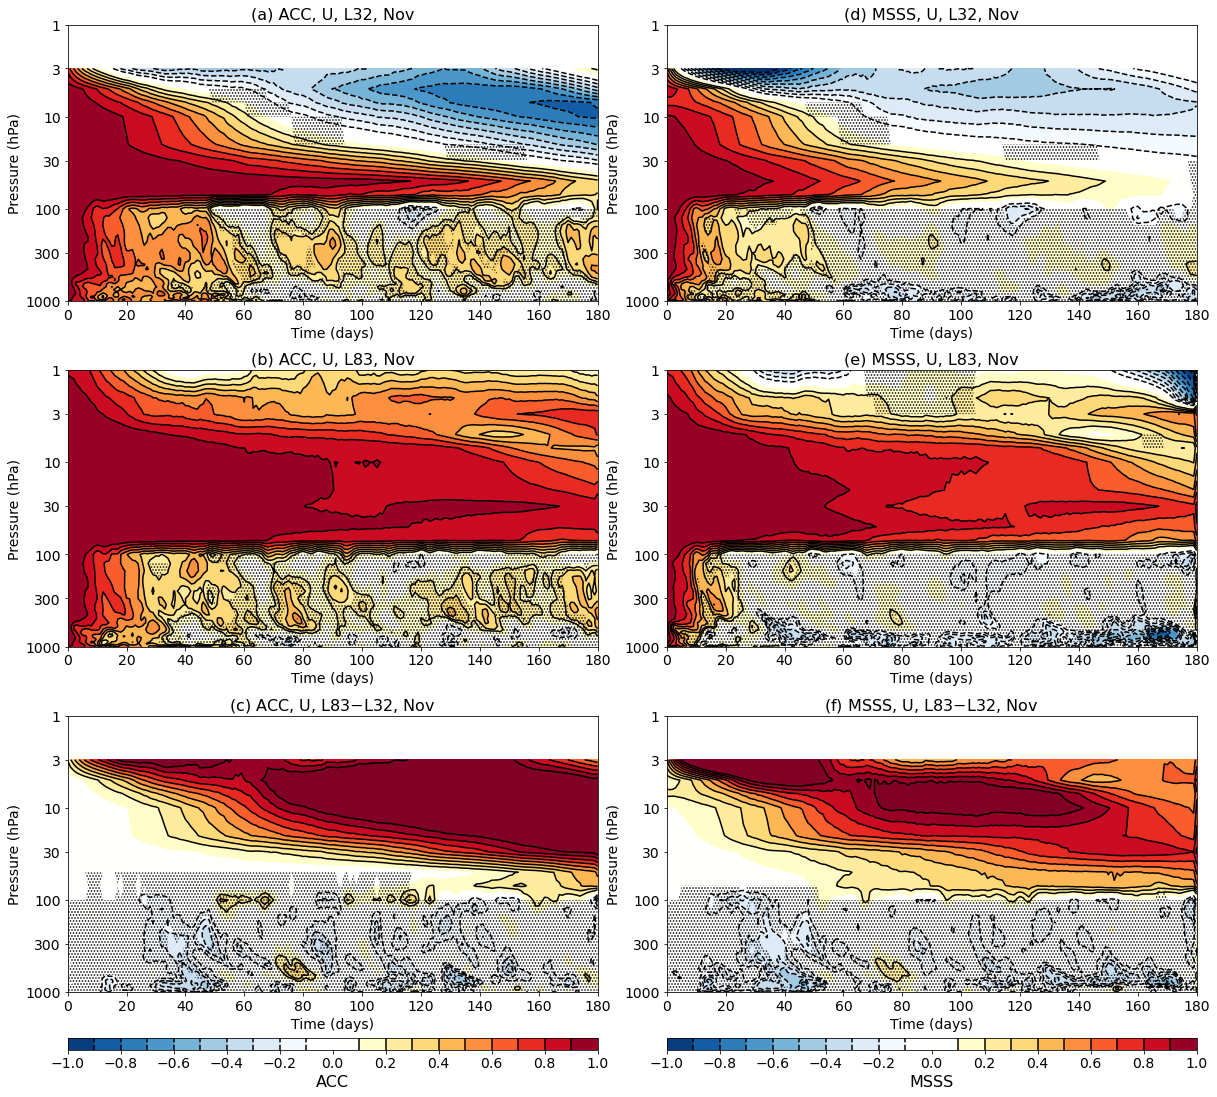

In [33]:
fig = plt.figure(figsize=(16,16))

signifdat = xr.DataArray(np.ones([signifdat_nov.time.size,signifdat_nov.level.size]), 
                         coords=[signifdat_nov.time, signifdat_nov.level], dims=['time','level'])

signifdatplot = signifdat.where( ~((signifdat_nov.min95_low_cor > 0) | (signifdat_nov.max95_low_cor < 0)), nan)
signifdatplot = signifdatplot.where(~np.isnan(acc_low_nov_uzm), nan)
ax = qbo.plot_lev_time(fig, acc_low_nov_uzm, np.arange(0,acc_low_nov_uzm.time.size,1), acc_low_nov_uzm.level, 0.1,-1,1,'(a) ACC, U, L32, Nov',
                       0.02,0.48,0.73,0.97,plevvar='level', contourlines=True, contourlinescale=1, signifdat=signifdatplot, stipplesignif=True)

signifdatplot = signifdat.where( ~((signifdat_nov.min95_high_cor > 0) | (signifdat_nov.max95_high_cor < 0)), nan)
ax = qbo.plot_lev_time(fig, acc_high_nov_uzm, np.arange(0,acc_high_nov_uzm.time.size,1), acc_high_nov_uzm.level, 0.1,-1,1,'(b) ACC, U, L83, Nov',
                       0.02,0.48,0.43,0.67,plevvar='level', contourlines=True, contourlinescale=1, signifdat = signifdatplot, stipplesignif=True)

signifdatplot = signifdat.where( ~((signifdat_nov.min95_dif_cor > 0) | (signifdat_nov.max95_dif_cor < 0)), nan)
signifdatplot = signifdatplot.where(~np.isnan(acc_low_nov_uzm), nan)
ax = qbo.plot_lev_time(fig, acc_high_nov_uzm - acc_low_nov_uzm, np.arange(0,acc_high_nov_uzm.time.size,1), acc_high_nov_uzm.level, 0.1,-1,1,'(c) ACC, U, L83$-$L32, Nov',
                       0.02,0.48,0.13,0.37,plevvar='level', contourlines=True, contourlinescale=1, signifdat = signifdatplot, stipplesignif=True)

ax = cbars.plotcolorbar(fig, 0.1,-1,1,'ACC',0.02,0.48,0.08,0.09,orient='horizontal',
                        ticks=[-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1], contourlines=True)

signifdatplot = signifdat.where( ~((signifdat_nov.min95_low_msss > 0) | (signifdat_nov.max95_low_msss < 0)), nan)
signifdatplot = signifdatplot.where(~np.isnan(acc_low_nov_uzm), nan)
ax = qbo.plot_lev_time(fig, msss_low_nov_uzm, np.arange(0,msss_low_nov_uzm.time.size,1), msss_low_nov_uzm.level,0.1,-1,1,'(d) MSSS, U, L32, Nov',
                       0.54,1.0,0.73,0.97,plevvar='level', contourlines=True, contourlinescale=1, signifdat = signifdatplot, stipplesignif=True)

signifdatplot = signifdat.where( ~((signifdat_nov.min95_high_msss > 0) | (signifdat_nov.max95_high_msss < 0)), nan)
ax = qbo.plot_lev_time(fig, msss_high_nov_uzm, np.arange(0,msss_high_nov_uzm.time.size,1), msss_high_nov_uzm.level,0.1,-1,1,'(e) MSSS, U, L83, Nov',
                       0.54,1.0,0.43,0.67,plevvar='level', contourlines=True, contourlinescale=1, signifdat=signifdatplot, stipplesignif=True)

signifdatplot = signifdat.where( ~((signifdat_nov.min95_dif_msss > 0) | (signifdat_nov.max95_dif_msss < 0)), nan)
signifdatplot = signifdatplot.where(~np.isnan(acc_low_nov_uzm), nan)
ax = qbo.plot_lev_time(fig, msss_high_nov_uzm - msss_low_nov_uzm, np.arange(0,msss_low_nov_uzm.time.size,1),msss_high_nov_uzm.level,0.1,-1,1,'(f) MSSS, U, L83$-$L32, Nov',
                       0.54,1.0,0.13,0.37,plevvar='level', contourlines=True, contourlinescale=1, signifdat=signifdatplot, stipplesignif=True)

ax = cbars.plotcolorbar(fig, 0.1,-1,1,'MSSS',0.54,1.,0.08,0.09,orient='horizontal',
                        ticks=[-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1], contourlines=True)

fig.savefig(plotpath+'fig1.png', bbox_inches='tight', facecolor='white')

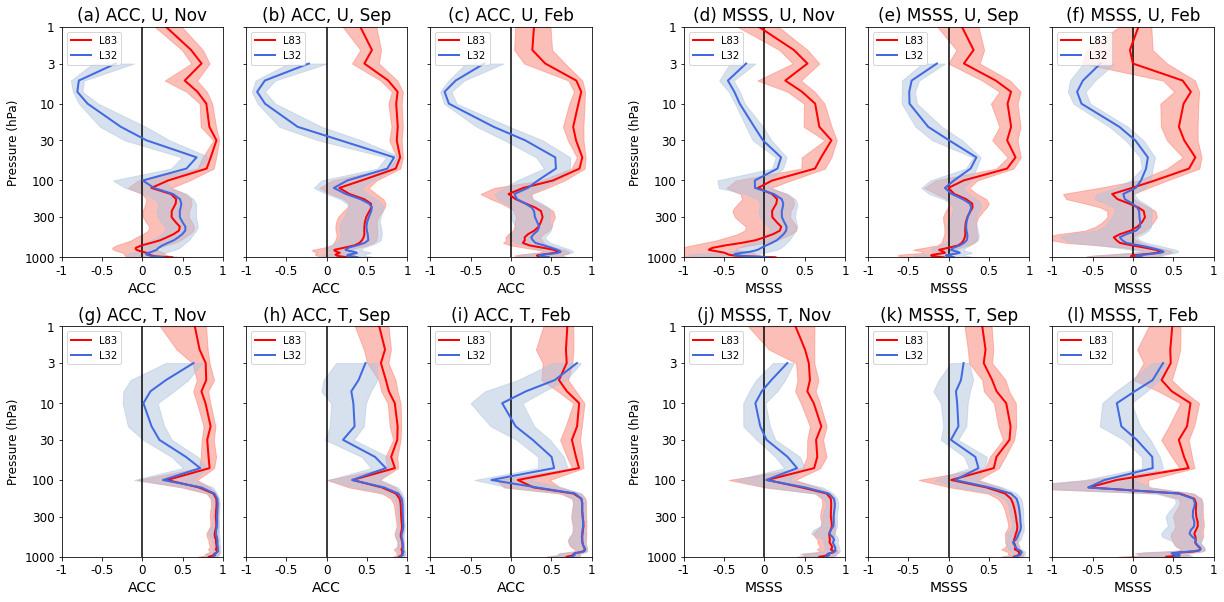

In [37]:
fig = plt.figure(figsize=(16,16))

ax = setup_2mon_plot(0.02,0.16,0.3,0.5,acc_high_nov_2mon_uzm, acc_low_nov_2mon_uzm, signifdat_nov_2mon.min95_high_cor, signifdat_nov_2mon.max95_high_cor,
                                       signifdat_nov_2mon.min95_low_cor, signifdat_nov_2mon.max95_low_cor, title='(a) ACC, U, Nov', xlabel='ACC', ylabel=True)

ax = setup_2mon_plot(0.18,0.32,0.3,0.5,acc_high_sep_2mon_uzm, acc_low_sep_2mon_uzm, signifdat_sep_2mon.min95_high_cor, signifdat_sep_2mon.max95_high_cor,
                                       signifdat_sep_2mon.min95_low_cor, signifdat_sep_2mon.max95_low_cor, title='(b) ACC, U, Sep', xlabel='ACC', ylabel=False, yticks=False)

ax = setup_2mon_plot(0.34,0.48,0.3,0.5,acc_high_feb_2mon_uzm, acc_low_feb_2mon_uzm, signifdat_feb_2mon.min95_high_cor, signifdat_feb_2mon.max95_high_cor,
                                       signifdat_feb_2mon.min95_low_cor, signifdat_feb_2mon.max95_low_cor, title='(c) ACC, U, Feb', xlabel='ACC', ylabel=False, yticks=False)



ax = setup_2mon_plot(0.56,0.7,0.3,0.5,msss_high_nov_2mon_uzm, msss_low_nov_2mon_uzm, signifdat_nov_2mon.min95_high_msss, signifdat_nov_2mon.max95_high_msss,
                                       signifdat_nov_2mon.min95_low_msss, signifdat_nov_2mon.max95_low_msss, title='(d) MSSS, U, Nov', xlabel='MSSS', ylabel=True)

ax = setup_2mon_plot(0.72,0.86,0.3,0.5,msss_high_sep_2mon_uzm, msss_low_sep_2mon_uzm, signifdat_sep_2mon.min95_high_msss, signifdat_sep_2mon.max95_high_msss,
                                       signifdat_sep_2mon.min95_low_msss, signifdat_sep_2mon.max95_low_msss, title='(e) MSSS, U, Sep', xlabel='MSSS', ylabel=False, yticks=False)

ax = setup_2mon_plot(0.88,1.02,0.3,0.5,msss_high_feb_2mon_uzm, msss_low_feb_2mon_uzm, signifdat_feb_2mon.min95_high_msss, signifdat_feb_2mon.max95_high_msss,
                                       signifdat_feb_2mon.min95_low_msss, signifdat_feb_2mon.max95_low_msss, title='(f) MSSS, U, Feb', xlabel='MSSS', ylabel=False, yticks=False)




ax = setup_2mon_plot(0.02,0.16,0.04,0.24,acc_high_nov_2mon_tzm, acc_low_nov_2mon_tzm, signifdat_nov_2mon_tzm.min95_high_cor, signifdat_nov_2mon_tzm.max95_high_cor,
                                       signifdat_nov_2mon_tzm.min95_low_cor, signifdat_nov_2mon_tzm.max95_low_cor, title='(g) ACC, T, Nov', xlabel='ACC', ylabel=True)

ax = setup_2mon_plot(0.18,0.32,0.04,0.24,acc_high_sep_2mon_tzm, acc_low_sep_2mon_tzm, signifdat_sep_2mon_tzm.min95_high_cor, signifdat_sep_2mon_tzm.max95_high_cor,
                                       signifdat_sep_2mon_tzm.min95_low_cor, signifdat_sep_2mon_tzm.max95_low_cor, title='(h) ACC, T, Sep', xlabel='ACC', ylabel=False, yticks=False)

ax = setup_2mon_plot(0.34,0.48,0.04,0.24,acc_high_feb_2mon_tzm, acc_low_feb_2mon_tzm, signifdat_feb_2mon_tzm.min95_high_cor, signifdat_feb_2mon_tzm.max95_high_cor,
                                       signifdat_feb_2mon_tzm.min95_low_cor, signifdat_feb_2mon_tzm.max95_low_cor, title='(i) ACC, T, Feb', xlabel='ACC', ylabel=False, yticks=False)



ax = setup_2mon_plot(0.56,0.7,0.04,0.24,msss_high_nov_2mon_tzm, msss_low_nov_2mon_tzm, signifdat_nov_2mon_tzm.min95_high_msss, signifdat_nov_2mon_tzm.max95_high_msss,
                                       signifdat_nov_2mon_tzm.min95_low_msss, signifdat_nov_2mon_tzm.max95_low_msss, title='(j) MSSS, T, Nov', xlabel='MSSS', ylabel=True)

ax = setup_2mon_plot(0.72,0.86,0.04,0.24,msss_high_sep_2mon_tzm, msss_low_sep_2mon_tzm, signifdat_sep_2mon_tzm.min95_high_msss, signifdat_sep_2mon_tzm.max95_high_msss,
                                       signifdat_sep_2mon_tzm.min95_low_msss, signifdat_sep_2mon_tzm.max95_low_msss, title='(k) MSSS, T, Sep', xlabel='MSSS', ylabel=False, yticks=False)

ax = setup_2mon_plot(0.88,1.02,0.04,0.24,msss_high_feb_2mon_tzm, msss_low_feb_2mon_tzm, signifdat_feb_2mon_tzm.min95_high_msss, signifdat_feb_2mon_tzm.max95_high_msss,
                                       signifdat_feb_2mon_tzm.min95_low_msss, signifdat_feb_2mon_tzm.max95_low_msss, title='(l) MSSS, T, Feb', xlabel='MSSS', ylabel=False, yticks=False)

fig.savefig(plotpath+'fig2.png', bbox_inches='tight', facecolor='white')

SystemExit: 

/project/cas02/islas/miniconda3/envs/islaenv/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


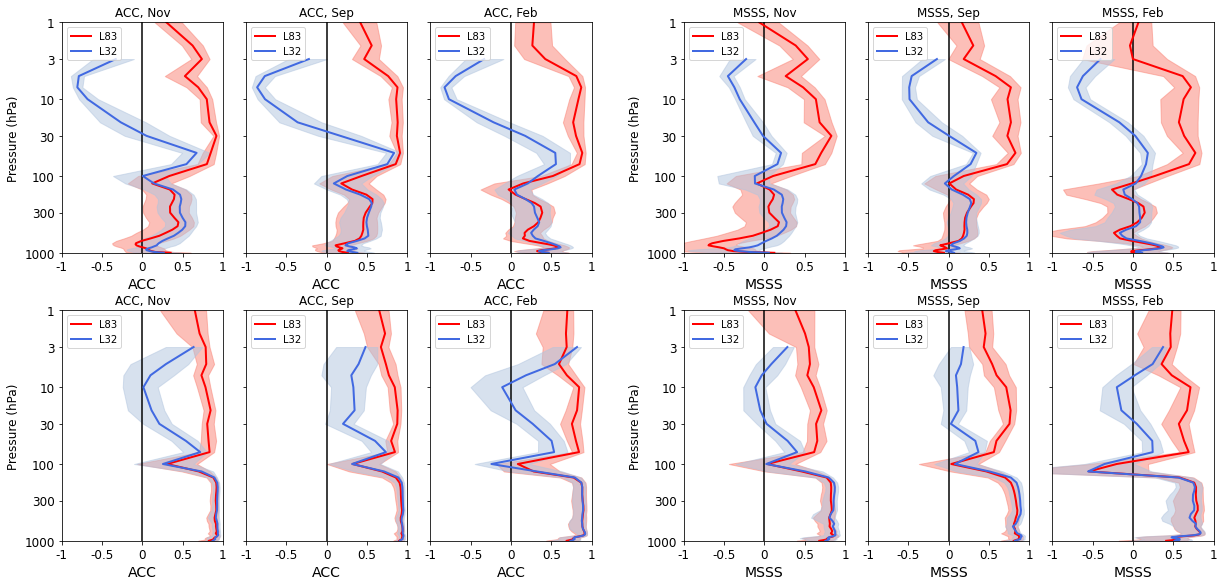

In [51]:
fig = plt.figure(figsize=(16,16))

ax = setup_2mon_plot(0.02,0.16,0.3,0.5,acc_high_nov_2mon_uzm, acc_low_nov_2mon_uzm, signifdat_nov_2mon.min95_high_cor, signifdat_nov_2mon.max95_high_cor,
                                       signifdat_nov_2mon.min95_low_cor, signifdat_nov_2mon.max95_low_cor, title='ACC, Nov', xlabel='ACC', ylabel=True)

ax = setup_2mon_plot(0.18,0.32,0.3,0.5,acc_high_sep_2mon_uzm, acc_low_sep_2mon_uzm, signifdat_sep_2mon.min95_high_cor, signifdat_sep_2mon.max95_high_cor,
                                       signifdat_sep_2mon.min95_low_cor, signifdat_sep_2mon.max95_low_cor, title='ACC, Sep', xlabel='ACC', ylabel=False, yticks=False)

ax = setup_2mon_plot(0.34,0.48,0.3,0.5,acc_high_feb_2mon_uzm, acc_low_feb_2mon_uzm, signifdat_feb_2mon.min95_high_cor, signifdat_feb_2mon.max95_high_cor,
                                       signifdat_feb_2mon.min95_low_cor, signifdat_feb_2mon.max95_low_cor, title='ACC, Feb', xlabel='ACC', ylabel=False, yticks=False)



ax = setup_2mon_plot(0.56,0.7,0.3,0.5,msss_high_nov_2mon_uzm, msss_low_nov_2mon_uzm, signifdat_nov_2mon.min95_high_msss, signifdat_nov_2mon.max95_high_msss,
                                       signifdat_nov_2mon.min95_low_msss, signifdat_nov_2mon.max95_low_msss, title='MSSS, Nov', xlabel='MSSS', ylabel=True)

ax = setup_2mon_plot(0.72,0.86,0.3,0.5,msss_high_sep_2mon_uzm, msss_low_sep_2mon_uzm, signifdat_sep_2mon.min95_high_msss, signifdat_sep_2mon.max95_high_msss,
                                       signifdat_sep_2mon.min95_low_msss, signifdat_sep_2mon.max95_low_msss, title='MSSS, Sep', xlabel='MSSS', ylabel=False, yticks=False)

ax = setup_2mon_plot(0.88,1.02,0.3,0.5,msss_high_feb_2mon_uzm, msss_low_feb_2mon_uzm, signifdat_feb_2mon.min95_high_msss, signifdat_feb_2mon.max95_high_msss,
                                       signifdat_feb_2mon.min95_low_msss, signifdat_feb_2mon.max95_low_msss, title='MSSS, Feb', xlabel='MSSS', ylabel=False, yticks=False)




ax = setup_2mon_plot(0.02,0.16,0.05,0.25,acc_high_nov_2mon_tzm, acc_low_nov_2mon_tzm, signifdat_nov_2mon_tzm.min95_high_cor, signifdat_nov_2mon_tzm.max95_high_cor,
                                       signifdat_nov_2mon_tzm.min95_low_cor, signifdat_nov_2mon_tzm.max95_low_cor, title='ACC, Nov', xlabel='ACC', ylabel=True)

ax = setup_2mon_plot(0.18,0.32,0.05,0.25,acc_high_sep_2mon_tzm, acc_low_sep_2mon_tzm, signifdat_sep_2mon_tzm.min95_high_cor, signifdat_sep_2mon_tzm.max95_high_cor,
                                       signifdat_sep_2mon_tzm.min95_low_cor, signifdat_sep_2mon_tzm.max95_low_cor, title='ACC, Sep', xlabel='ACC', ylabel=False, yticks=False)

ax = setup_2mon_plot(0.34,0.48,0.05,0.25,acc_high_feb_2mon_tzm, acc_low_feb_2mon_tzm, signifdat_feb_2mon_tzm.min95_high_cor, signifdat_feb_2mon_tzm.max95_high_cor,
                                       signifdat_feb_2mon_tzm.min95_low_cor, signifdat_feb_2mon_tzm.max95_low_cor, title='ACC, Feb', xlabel='ACC', ylabel=False, yticks=False)



ax = setup_2mon_plot(0.56,0.7,0.05,0.25,msss_high_nov_2mon_tzm, msss_low_nov_2mon_tzm, signifdat_nov_2mon_tzm.min95_high_msss, signifdat_nov_2mon_tzm.max95_high_msss,
                                       signifdat_nov_2mon_tzm.min95_low_msss, signifdat_nov_2mon_tzm.max95_low_msss, title='MSSS, Nov', xlabel='MSSS', ylabel=True)

ax = setup_2mon_plot(0.72,0.86,0.05,0.25,msss_high_sep_2mon_tzm, msss_low_sep_2mon_tzm, signifdat_sep_2mon_tzm.min95_high_msss, signifdat_sep_2mon_tzm.max95_high_msss,
                                       signifdat_sep_2mon_tzm.min95_low_msss, signifdat_sep_2mon_tzm.max95_low_msss, title='MSSS, Sep', xlabel='MSSS', ylabel=False, yticks=False)

ax = setup_2mon_plot(0.88,1.02,0.05,0.25,msss_high_feb_2mon_tzm, msss_low_feb_2mon_tzm, signifdat_feb_2mon_tzm.min95_high_msss, signifdat_feb_2mon_tzm.max95_high_msss,
                                       signifdat_feb_2mon_tzm.min95_low_msss, signifdat_feb_2mon_tzm.max95_low_msss, title='MSSS, Feb', xlabel='MSSS', ylabel=False, yticks=False)


sys.exit()

ax = setup_2mon_plot(0.02,0.16,0.05,0.25,acc_high_nov_2mon, acc_low_nov_2mon, signifdat_nov_2mon.min95_high_cor, signifdat_nov_2mon.max95_high_cor,
                                       signifdat_nov_2mon.min95_low_cor, signifdat_nov_2mon.max95_low_cor, title='ACC, Nov', xlabel='ACC', ylabel=True)

ax = setup_2mon_plot(0.18,0.32,0.05,0.25,acc_high_sep_2mon, acc_low_sep_2mon, signifdat_sep_2mon.min95_high_cor, signifdat_sep_2mon.max95_high_cor,
                                       signifdat_sep_2mon.min95_low_cor, signifdat_sep_2mon.max95_low_cor, title='ACC, Sep', xlabel='ACC', ylabel=False, yticks=False)

ax = setup_2mon_plot(0.34,0.48,0.05,0.25,acc_high_feb_2mon, acc_low_feb_2mon, signifdat_feb_2mon.min95_high_cor, signifdat_feb_2mon.max95_high_cor,
                                       signifdat_feb_2mon.min95_low_cor, signifdat_feb_2mon.max95_low_cor, title='ACC, Feb', xlabel='ACC', ylabel=False, yticks=False)



ax = setup_2mon_plot(0.56,0.7,0.05,0.25,msss_high_nov_2mon, msss_low_nov_2mon, signifdat_nov_2mon.min95_high_msss, signifdat_nov_2mon.max95_high_msss,
                                       signifdat_nov_2mon.min95_low_msss, signifdat_nov_2mon.max95_low_msss, title='MSSS, Nov', xlabel='MSSS', ylabel=True)

ax = setup_2mon_plot(0.72,0.86,0.05,0.25,msss_high_sep_2mon, msss_low_sep_2mon, signifdat_sep_2mon.min95_high_msss, signifdat_sep_2mon.max95_high_msss,
                                       signifdat_sep_2mon.min95_low_msss, signifdat_sep_2mon.max95_low_msss, title='MSSS, Sep', xlabel='MSSS', ylabel=False, yticks=False)

ax = setup_2mon_plot(0.88,1.02,0.05,0.25,msss_high_feb_2mon, msss_low_feb_2mon, signifdat_feb_2mon.min95_high_msss, signifdat_feb_2mon.max95_high_msss,
                                       signifdat_feb_2mon.min95_low_msss, signifdat_feb_2mon.max95_low_msss, title='MSSS, Feb', xlabel='MSSS', ylabel=False, yticks=False)




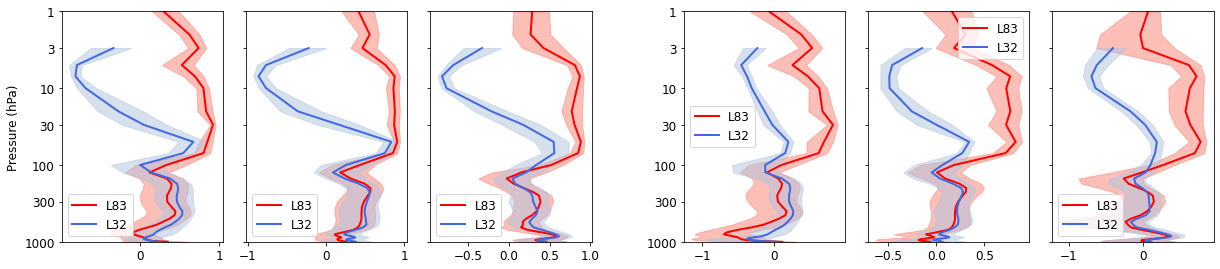

In [280]:
fig = plt.figure(figsize=(16,16))

ax = fig.add_axes([0.02,0.3,0.14,0.2])
ax.set_ylim(-np.log10(1000),-np.log10(1))
ax.set_yticks([-np.log10(1000),-np.log10(300),-np.log10(100),-np.log10(30),-np.log10(10), -np.log10(3),-np.log10(1)])
ax.set_yticklabels(['1000','300','100','30','10','3','1'])
ax.set_ylabel('Pressure (hPa)', fontsize=12)
ax.fill_betweenx(-np.log10(signifdat_nov_2mon.level),signifdat_nov_2mon.min95_high_cor, signifdat_nov_2mon.max95_high_cor, color='salmon', alpha=0.5)
ax.plot(acc_high_nov_2mon, -np.log10(acc_high_nov_2mon.level), color='red', linewidth=2, label='L83')
ax.fill_betweenx(-np.log10(signifdat_nov_2mon.level), signifdat_nov_2mon.min95_low_cor, signifdat_nov_2mon.max95_low_cor, color='lightsteelblue', alpha=0.5)
ax.plot(acc_low_nov_2mon, -np.log10(acc_low_nov_2mon.level), color='royalblue', linewidth=2, label='L32')
ax.legend()

ax = fig.add_axes([0.18,0.3,0.14,0.2])
ax.set_ylim(-np.log10(1000),-np.log10(1))
ax.set_yticks([-np.log10(1000),-np.log10(300),-np.log10(100),-np.log10(30),-np.log10(10), -np.log10(3),-np.log10(1)])
ax.set_yticklabels(['','','','','','',''])
ax.fill_betweenx(-np.log10(signifdat_sep_2mon.level),signifdat_sep_2mon.min95_high_cor, signifdat_sep_2mon.max95_high_cor, color='salmon', alpha=0.5)
ax.plot(acc_high_sep_2mon, -np.log10(acc_high_sep_2mon.level), color='red', linewidth=2, label='L83')
ax.fill_betweenx(-np.log10(signifdat_sep_2mon.level), signifdat_sep_2mon.min95_low_cor, signifdat_sep_2mon.max95_low_cor, color='lightsteelblue', alpha=0.5)
ax.plot(acc_low_sep_2mon, -np.log10(acc_low_sep_2mon.level), color='royalblue', linewidth=2, label='L32')
ax.legend()

ax = fig.add_axes([0.34,0.3,0.14,0.2])
ax.set_ylim(-np.log10(1000),-np.log10(1))
ax.set_yticks([-np.log10(1000),-np.log10(300),-np.log10(100),-np.log10(30),-np.log10(10), -np.log10(3),-np.log10(1)])
ax.set_yticklabels(['','','','','','',''])
ax.fill_betweenx(-np.log10(signifdat_feb_2mon.level),signifdat_feb_2mon.min95_high_cor, signifdat_feb_2mon.max95_high_cor, color='salmon', alpha=0.5)
ax.plot(acc_high_feb_2mon, -np.log10(acc_high_feb_2mon.level), color='red', linewidth=2, label='L83')
ax.fill_betweenx(-np.log10(signifdat_feb_2mon.level), signifdat_feb_2mon.min95_low_cor, signifdat_feb_2mon.max95_low_cor, color='lightsteelblue', alpha=0.5)
ax.plot(acc_low_feb_2mon, -np.log10(acc_low_feb_2mon.level), color='royalblue', linewidth=2, label='L32')
ax.legend()


ax = fig.add_axes([0.56,0.3,0.14,0.2])
ax.set_ylim(-np.log10(1000),-np.log10(1))
ax.set_yticks([-np.log10(1000),-np.log10(300),-np.log10(100),-np.log10(30),-np.log10(10), -np.log10(3),-np.log10(1)])
ax.set_yticklabels(['1000','300','100','30','10','3','1'])
ax.fill_betweenx(-np.log10(signifdat_nov_2mon.level),signifdat_nov_2mon.min95_high_msss, signifdat_nov_2mon.max95_high_msss, color='salmon', alpha=0.5)
ax.plot(msss_high_nov_2mon, -np.log10(msss_high_nov_2mon.level), color='red', linewidth=2, label='L83')
ax.fill_betweenx(-np.log10(signifdat_nov_2mon.level), signifdat_nov_2mon.min95_low_msss, signifdat_nov_2mon.max95_low_msss, color='lightsteelblue', alpha=0.5)
ax.plot(msss_low_nov_2mon, -np.log10(msss_low_nov_2mon.level), color='royalblue', linewidth=2, label='L32')
ax.legend()

ax = fig.add_axes([0.72,0.3,0.14,0.2])
ax.set_ylim(-np.log10(1000),-np.log10(1))
ax.set_yticks([-np.log10(1000),-np.log10(300),-np.log10(100),-np.log10(30),-np.log10(10), -np.log10(3),-np.log10(1)])
ax.set_yticklabels(['','','','','','',''])
ax.fill_betweenx(-np.log10(signifdat_sep_2mon.level),signifdat_sep_2mon.min95_high_msss, signifdat_sep_2mon.max95_high_msss, color='salmon', alpha=0.5)
ax.plot(msss_high_sep_2mon, -np.log10(msss_high_sep_2mon.level), color='red', linewidth=2, label='L83')
ax.fill_betweenx(-np.log10(signifdat_sep_2mon.level), signifdat_sep_2mon.min95_low_msss, signifdat_sep_2mon.max95_low_msss, color='lightsteelblue', alpha=0.5)
ax.plot(msss_low_sep_2mon, -np.log10(msss_low_sep_2mon.level), color='royalblue', linewidth=2, label='L32')
ax.legend()

ax = fig.add_axes([0.88,0.3,0.14,0.2])
ax.set_ylim(-np.log10(1000),-np.log10(1))
ax.set_yticks([-np.log10(1000),-np.log10(300),-np.log10(100),-np.log10(30),-np.log10(10), -np.log10(3),-np.log10(1)])
ax.set_yticklabels(['','','','','','',''])
ax.fill_betweenx(-np.log10(signifdat_feb_2mon.level),signifdat_feb_2mon.min95_high_msss, signifdat_feb_2mon.max95_high_msss, color='salmon', alpha=0.5)
ax.plot(msss_high_feb_2mon, -np.log10(msss_high_feb_2mon.level), color='red', linewidth=2, label='L83')
ax.fill_betweenx(-np.log10(signifdat_feb_2mon.level), signifdat_feb_2mon.min95_low_msss, signifdat_feb_2mon.max95_low_msss, color='lightsteelblue', alpha=0.5)
ax.plot(msss_low_feb_2mon, -np.log10(msss_low_feb_2mon.level), color='royalblue', linewidth=2, label='L32')
ax.legend()



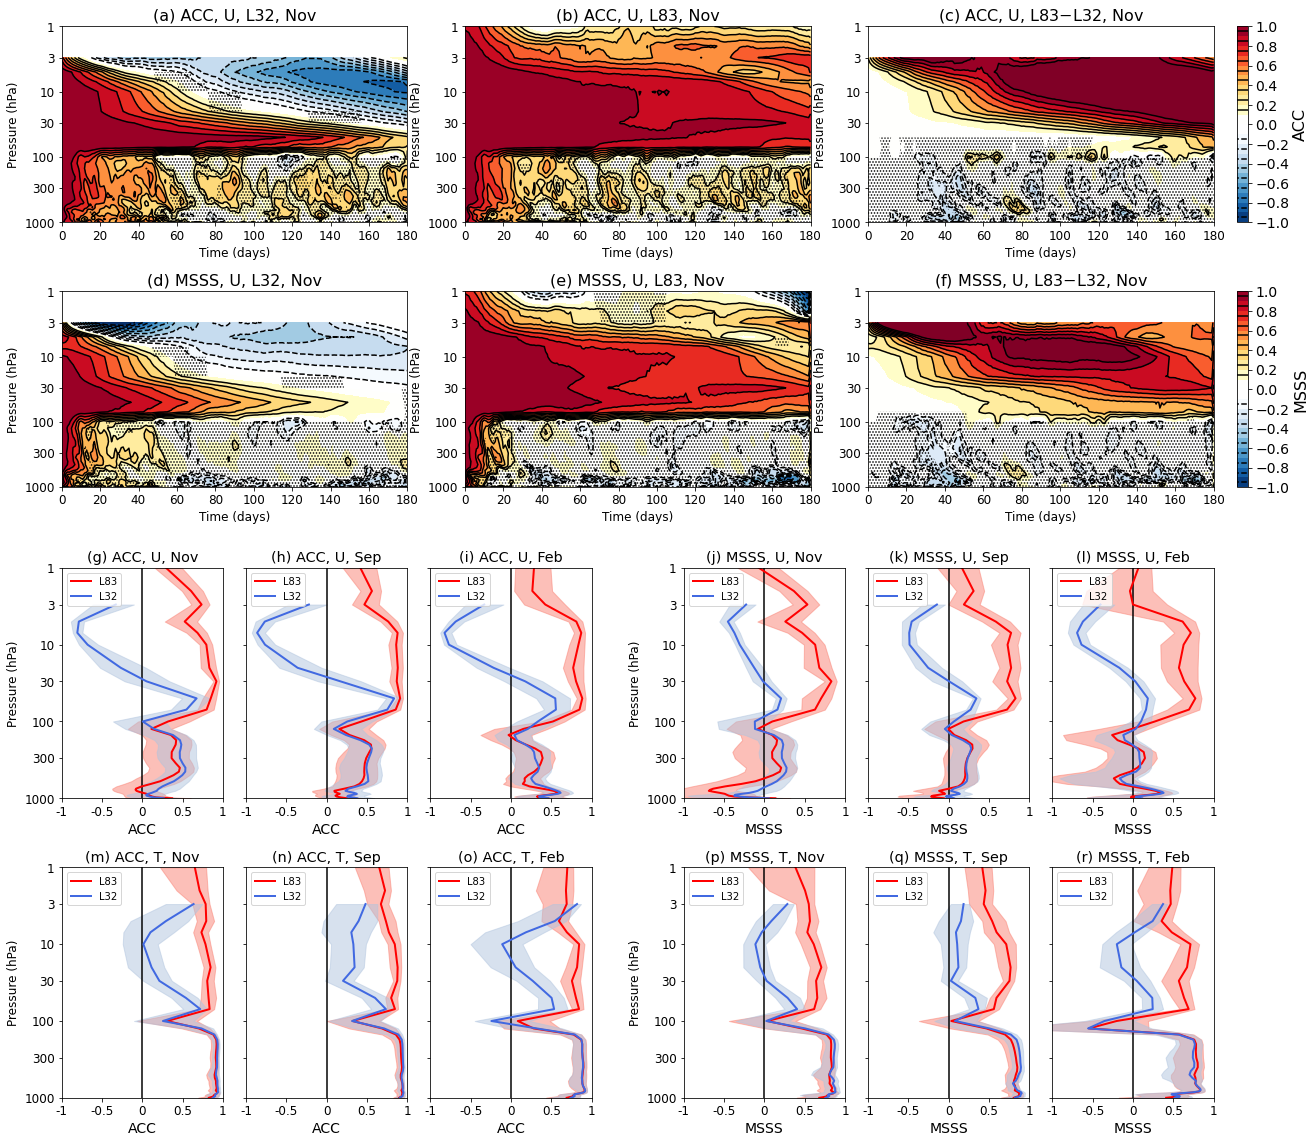

In [15]:
fig = plt.figure(figsize=(16,16))

signifdat = xr.DataArray(np.ones([signifdat_nov.time.size,signifdat_nov.level.size]), 
                         coords=[signifdat_nov.time, signifdat_nov.level], dims=['time','level'])

signifdatplot = signifdat.where( ~((signifdat_nov.min95_low_cor > 0) | (signifdat_nov.max95_low_cor < 0)), nan)
signifdatplot = signifdatplot.where(~np.isnan(acc_low_nov_uzm), nan)
ax = qbo.plot_lev_time(fig, acc_low_nov_uzm, np.arange(0,acc_low_nov_uzm.time.size,1), acc_low_nov_uzm.level, 0.1,-1,1,'(a) ACC, U, L32, Nov',
                       0.02,0.32,0.8,0.97,plevvar='level', contourlines=True, contourlinescale=1, signifdat=signifdatplot, stipplesignif=True)

signifdatplot = signifdat.where( ~((signifdat_nov.min95_high_cor > 0) | (signifdat_nov.max95_high_cor < 0)), nan)
ax = qbo.plot_lev_time(fig, acc_high_nov_uzm, np.arange(0,acc_high_nov_uzm.time.size,1), acc_high_nov_uzm.level, 0.1,-1,1,'(b) ACC, U, L83, Nov',
                       0.37,0.67,0.8,0.97,plevvar='level', contourlines=True, contourlinescale=1, signifdat = signifdatplot, stipplesignif=True)

signifdatplot = signifdat.where( ~((signifdat_nov.min95_dif_cor > 0) | (signifdat_nov.max95_dif_cor < 0)), nan)
signifdatplot = signifdatplot.where(~np.isnan(acc_low_nov_uzm), nan)
ax = qbo.plot_lev_time(fig, acc_high_nov_uzm - acc_low_nov_uzm, np.arange(0,acc_high_nov_uzm.time.size,1), acc_high_nov_uzm.level, 0.1,-1,1,'(c) ACC, U, L83$-$L32, Nov',
                       0.72,1.02,0.8,0.97,plevvar='level', contourlines=True, contourlinescale=1, signifdat = signifdatplot, stipplesignif=True)

ax = cbars.plotcolorbar(fig, 0.1,-1,1,'ACC',1.04,1.05,0.8,0.97,orient='vertical',
                        ticks=[-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1], contourlines=True)



signifdatplot = signifdat.where( ~((signifdat_nov.min95_low_msss > 0) | (signifdat_nov.max95_low_msss < 0)), nan)
signifdatplot = signifdatplot.where(~np.isnan(acc_low_nov_uzm), nan)
ax = qbo.plot_lev_time(fig, msss_low_nov_uzm, np.arange(0,msss_low_nov_uzm.time.size,1), msss_low_nov_uzm.level,0.1,-1,1,'(d) MSSS, U, L32, Nov',
                       0.02,0.32,0.57,0.74,plevvar='level', contourlines=True, contourlinescale=1, signifdat = signifdatplot, stipplesignif=True)

signifdatplot = signifdat.where( ~((signifdat_nov.min95_high_msss > 0) | (signifdat_nov.max95_high_msss < 0)), nan)
ax = qbo.plot_lev_time(fig, msss_high_nov_uzm, np.arange(0,msss_high_nov_uzm.time.size,1), msss_high_nov_uzm.level,0.1,-1,1,'(e) MSSS, U, L83, Nov',
                       0.37,0.67,0.57,0.74,plevvar='level', contourlines=True, contourlinescale=1, signifdat=signifdatplot, stipplesignif=True)

signifdatplot = signifdat.where( ~((signifdat_nov.min95_dif_msss > 0) | (signifdat_nov.max95_dif_msss < 0)), nan)
signifdatplot = signifdatplot.where(~np.isnan(acc_low_nov_uzm), nan)
ax = qbo.plot_lev_time(fig, msss_high_nov_uzm - msss_low_nov_uzm, np.arange(0,msss_low_nov_uzm.time.size,1),msss_high_nov_uzm.level,0.1,-1,1,'(f) MSSS, U, L83$-$L32, Nov',
                       0.72,1.02,0.57,0.74,plevvar='level', contourlines=True, contourlinescale=1, signifdat=signifdatplot, stipplesignif=True)

ax = cbars.plotcolorbar(fig, 0.1,-1,1,'MSSS',1.04,1.05,0.57,0.74,orient='vertical',
                        ticks=[-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1], contourlines=True)


#ax = setup_2mon_plot(0.02,0.16,0.3,0.5,acc_high_nov_2mon, acc_low_nov_2mon, signifdat_nov_2mon.min95_high_cor, signifdat_nov_2mon.max95_high_cor,
#                                       signifdat_nov_2mon.min95_low_cor, signifdat_nov_2mon.max95_low_cor, title='(g) ACC, Nov', xlabel='ACC', ylabel=True)

#ax = setup_2mon_plot(0.18,0.32,0.3,0.5,acc_high_sep_2mon, acc_low_sep_2mon, signifdat_sep_2mon.min95_high_cor, signifdat_sep_2mon.max95_high_cor,
#                                       signifdat_sep_2mon.min95_low_cor, signifdat_sep_2mon.max95_low_cor, title='(h) ACC, Sep', xlabel='ACC', ylabel=False, yticks=False)

#ax = setup_2mon_plot(0.34,0.48,0.3,0.5,acc_high_feb_2mon, acc_low_feb_2mon, signifdat_feb_2mon.min95_high_cor, signifdat_feb_2mon.max95_high_cor,
#                                       signifdat_feb_2mon.min95_low_cor, signifdat_feb_2mon.max95_low_cor, title='(i) ACC, Feb', xlabel='ACC', ylabel=False, yticks=False)



#ax = setup_2mon_plot(0.56,0.7,0.3,0.5,msss_high_nov_2mon, msss_low_nov_2mon, signifdat_nov_2mon.min95_high_msss, signifdat_nov_2mon.max95_high_msss,
#                                       signifdat_nov_2mon.min95_low_msss, signifdat_nov_2mon.max95_low_msss, title='(j) MSSS, Nov', xlabel='MSSS', ylabel=True)

#ax = setup_2mon_plot(0.72,0.86,0.3,0.5,msss_high_sep_2mon, msss_low_sep_2mon, signifdat_sep_2mon.min95_high_msss, signifdat_sep_2mon.max95_high_msss,
#                                       signifdat_sep_2mon.min95_low_msss, signifdat_sep_2mon.max95_low_msss, title='(k) MSSS, Sep', xlabel='MSSS', ylabel=False, yticks=False)

#ax = setup_2mon_plot(0.88,1.02,0.3,0.5,msss_high_feb_2mon, msss_low_feb_2mon, signifdat_feb_2mon.min95_high_msss, signifdat_feb_2mon.max95_high_msss,
#                                       signifdat_feb_2mon.min95_low_msss, signifdat_feb_2mon.max95_low_msss, title='(l) MSSS, Feb', xlabel='MSSS', ylabel=False, yticks=False)


ax = setup_2mon_plot(0.02,0.16,0.3,0.5,acc_high_nov_2mon_uzm, acc_low_nov_2mon_uzm, signifdat_nov_2mon.min95_high_cor, signifdat_nov_2mon.max95_high_cor,
                                       signifdat_nov_2mon.min95_low_cor, signifdat_nov_2mon.max95_low_cor, title='(g) ACC, U, Nov', xlabel='ACC', ylabel=True)

ax = setup_2mon_plot(0.18,0.32,0.3,0.5,acc_high_sep_2mon_uzm, acc_low_sep_2mon_uzm, signifdat_sep_2mon.min95_high_cor, signifdat_sep_2mon.max95_high_cor,
                                       signifdat_sep_2mon.min95_low_cor, signifdat_sep_2mon.max95_low_cor, title='(h) ACC, U, Sep', xlabel='ACC', ylabel=False, yticks=False)

ax = setup_2mon_plot(0.34,0.48,0.3,0.5,acc_high_feb_2mon_uzm, acc_low_feb_2mon_uzm, signifdat_feb_2mon.min95_high_cor, signifdat_feb_2mon.max95_high_cor,
                                       signifdat_feb_2mon.min95_low_cor, signifdat_feb_2mon.max95_low_cor, title='(i) ACC, U, Feb', xlabel='ACC', ylabel=False, yticks=False)



ax = setup_2mon_plot(0.56,0.7,0.3,0.5,msss_high_nov_2mon_uzm, msss_low_nov_2mon_uzm, signifdat_nov_2mon.min95_high_msss, signifdat_nov_2mon.max95_high_msss,
                                       signifdat_nov_2mon.min95_low_msss, signifdat_nov_2mon.max95_low_msss, title='(j) MSSS, U, Nov', xlabel='MSSS', ylabel=True)

ax = setup_2mon_plot(0.72,0.86,0.3,0.5,msss_high_sep_2mon_uzm, msss_low_sep_2mon_uzm, signifdat_sep_2mon.min95_high_msss, signifdat_sep_2mon.max95_high_msss,
                                       signifdat_sep_2mon.min95_low_msss, signifdat_sep_2mon.max95_low_msss, title='(k) MSSS, U, Sep', xlabel='MSSS', ylabel=False, yticks=False)

ax = setup_2mon_plot(0.88,1.02,0.3,0.5,msss_high_feb_2mon_uzm, msss_low_feb_2mon_uzm, signifdat_feb_2mon.min95_high_msss, signifdat_feb_2mon.max95_high_msss,
                                       signifdat_feb_2mon.min95_low_msss, signifdat_feb_2mon.max95_low_msss, title='(l) MSSS, U, Feb', xlabel='MSSS', ylabel=False, yticks=False)




ax = setup_2mon_plot(0.02,0.16,0.04,0.24,acc_high_nov_2mon_tzm, acc_low_nov_2mon_tzm, signifdat_nov_2mon_tzm.min95_high_cor, signifdat_nov_2mon_tzm.max95_high_cor,
                                       signifdat_nov_2mon_tzm.min95_low_cor, signifdat_nov_2mon_tzm.max95_low_cor, title='(m) ACC, T, Nov', xlabel='ACC', ylabel=True)

ax = setup_2mon_plot(0.18,0.32,0.04,0.24,acc_high_sep_2mon_tzm, acc_low_sep_2mon_tzm, signifdat_sep_2mon_tzm.min95_high_cor, signifdat_sep_2mon_tzm.max95_high_cor,
                                       signifdat_sep_2mon_tzm.min95_low_cor, signifdat_sep_2mon_tzm.max95_low_cor, title='(n) ACC, T, Sep', xlabel='ACC', ylabel=False, yticks=False)

ax = setup_2mon_plot(0.34,0.48,0.04,0.24,acc_high_feb_2mon_tzm, acc_low_feb_2mon_tzm, signifdat_feb_2mon_tzm.min95_high_cor, signifdat_feb_2mon_tzm.max95_high_cor,
                                       signifdat_feb_2mon_tzm.min95_low_cor, signifdat_feb_2mon_tzm.max95_low_cor, title='(o) ACC, T, Feb', xlabel='ACC', ylabel=False, yticks=False)



ax = setup_2mon_plot(0.56,0.7,0.04,0.24,msss_high_nov_2mon_tzm, msss_low_nov_2mon_tzm, signifdat_nov_2mon_tzm.min95_high_msss, signifdat_nov_2mon_tzm.max95_high_msss,
                                       signifdat_nov_2mon_tzm.min95_low_msss, signifdat_nov_2mon_tzm.max95_low_msss, title='(p) MSSS, T, Nov', xlabel='MSSS', ylabel=True)

ax = setup_2mon_plot(0.72,0.86,0.04,0.24,msss_high_sep_2mon_tzm, msss_low_sep_2mon_tzm, signifdat_sep_2mon_tzm.min95_high_msss, signifdat_sep_2mon_tzm.max95_high_msss,
                                       signifdat_sep_2mon_tzm.min95_low_msss, signifdat_sep_2mon_tzm.max95_low_msss, title='(q) MSSS, T, Sep', xlabel='MSSS', ylabel=False, yticks=False)

ax = setup_2mon_plot(0.88,1.02,0.04,0.24,msss_high_feb_2mon_tzm, msss_low_feb_2mon_tzm, signifdat_feb_2mon_tzm.min95_high_msss, signifdat_feb_2mon_tzm.max95_high_msss,
                                       signifdat_feb_2mon_tzm.min95_low_msss, signifdat_feb_2mon_tzm.max95_low_msss, title='(r) MSSS, T, Feb', xlabel='MSSS', ylabel=False, yticks=False)




fig.savefig(plotpath+'fig1_qboskill.png', bbox_inches='tight', facecolor='white')
